In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

from src.visual_utils import plot_data_bar, plot_data_line, plot_data_line_multiple
from src.stats_utils import calculate_retention, print_basic_stats

In [2]:
files = glob.glob("data/raw/*.csv.gz")


dfs = [pd.read_csv(f, compression="gzip") for f in files]
df = pd.concat(dfs)
df["install_date"] = pd.to_datetime(df["install_date"])
df["event_date"] = pd.to_datetime(df["event_date"])

# Add a new column for later use.
df["days_after_install"] = (df["event_date"] - df["install_date"]).dt.days


In [ ]:
for column in df.select_dtypes(include="number").columns:
    print_basic_stats(df[column], name=column)

An interesting (maybe not so shocking) insight from the dataset is below:

X axis is days and y axis is daily active users.  >
We can see from the bar chart that the players are significantly more active during 2 days of the week. And those days are Saturday and Sunday.

In [ ]:
daily_active_users = df.groupby("event_date")["user_id"].nunique()
x = daily_active_users.index
y = daily_active_users.values

plot_data_bar(x, y, 45)

In [ ]:
d1_retention = calculate_retention(df, 1)
d3_retention = calculate_retention(df, 3)
d7_retention = calculate_retention(df, 7)

x_values_list = [d1_retention.index, d3_retention.index, d7_retention.index]
y_values_list = [d1_retention.values, d3_retention.values, d7_retention.values]
labels = ["D1 retention", "D3 retention", "D7 retention"]

plot_data_line_multiple(x_values_list, y_values_list, labels, 45)

c:\Users\PC\Desktop\Programming_Projects\vertigo-games-data-analysis\src\visual_utils.py:104: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


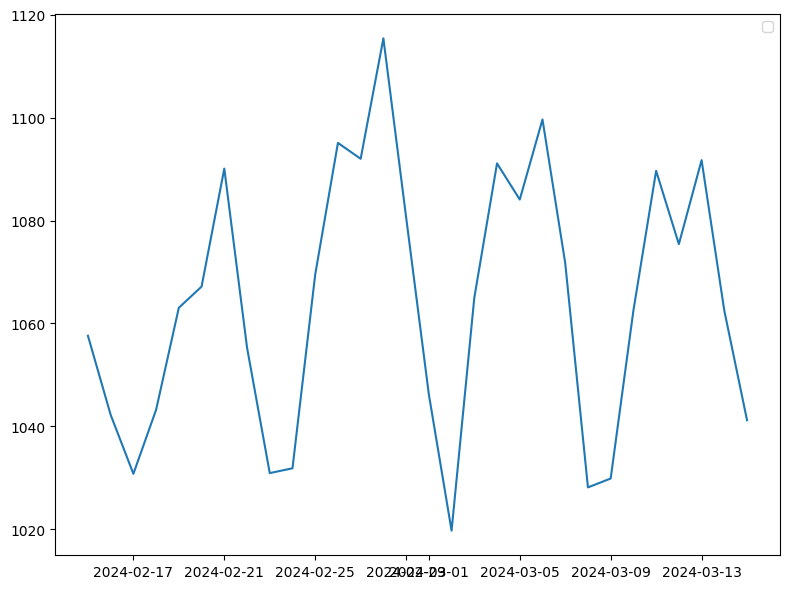

In [3]:
total_session_durations = df.groupby("event_date")["total_session_duration"].sum()
total_session_counts = df.groupby("event_date")["total_session_count"].sum()
plot_data_line(total_session_counts.index, (total_session_durations / total_session_counts).values)